In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Mmt = Base.classes.measurement
Sta = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent = session.query(Mmt.date).order_by(Mmt.date.desc()).first()
recent = str(recent).replace('(','').replace(')','').replace("'","").replace(",","")

In [10]:
# Checking what type of data is in the date column.
columns = inspect(engine).get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Convert the text column of date to a date-time format.
dt_column = dt.datetime.strptime(recent,'%Y-%m-%d')

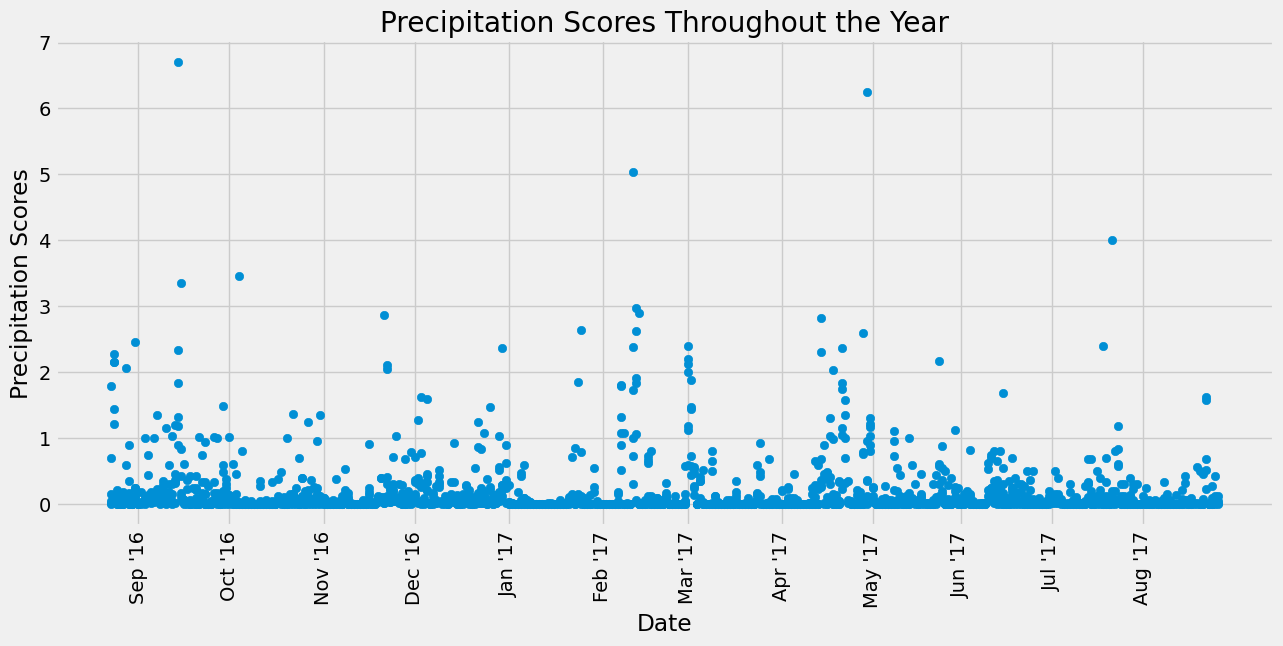

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
first_date = dt_column - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Mmt.date, Mmt.prcp).filter(Mmt.date >= first_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
conn = engine.connect()
data = pd.read_sql_query("SELECT m.date, m.prcp FROM measurement as m WHERE m.date >= '2016-08-23'",conn, index_col="date")

# Checking that the date is the index
# print(data.index)

# Sort the dataframe by date
# It already is?

# Use Pandas Plotting with Matplotlib to plot the data
x_values = data.index
y_values = data["prcp"]
plt.figure(figsize = (14,6))
plt.scatter(x_values,y_values)
plt.xlabel("Date")
plt.ylabel("Precipitation Scores")
plt.title("Precipitation Scores Throughout the Year")
plt.xticks(["2016-09-01", "2016-10-01", "2016-11-01", "2016-12-01", "2017-01-01", "2017-02-01", "2017-03-01", "2017-04-01", "2017-05-01", "2017-06-01", "2017-07-01", "2017-08-01"],
["Sep '16", "Oct '16", "Nov '16", "Dec '16", "Jan '17", "Feb '17", "Mar '17", "Apr '17", "May '17", "Jun '17", "Jul '17", "Aug '17"], rotation=90)
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
round(data.describe(),3)

,prcp
count,2021.000
mean,0.177
std,0.461
min,0.000
25%,0.000
50%,0.020
75%,0.130
max,6.700


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Mmt.station).distinct().count()

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Mmt.station, func.count(Mmt.date)).group_by(Mmt.station).order_by(func.count(Mmt.date).desc())
for s in station_count:
    print(s)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Max_temp = session.query(Mmt.tobs).filter(Mmt.station == "USC00519281").order_by(Mmt.tobs.desc()).first()
Min_temp = session.query(Mmt.tobs).filter(Mmt.station == "USC00519281").order_by(Mmt.tobs).first()
Average_temp = session.query(func.avg(Mmt.tobs)).filter(Mmt.station == "USC00519281").first()

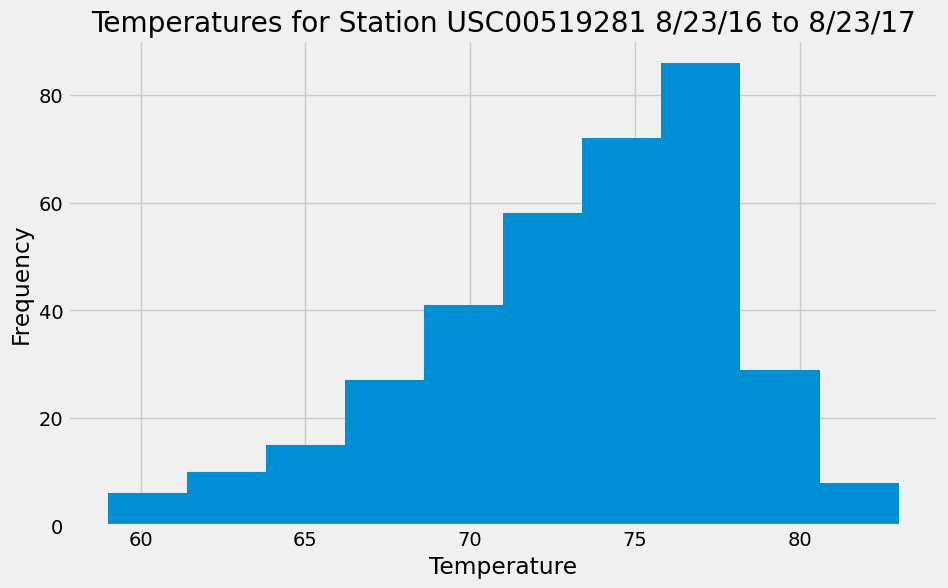

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
conn = engine.connect()
temperatures = pd.read_sql_query("SELECT m.date, m.tobs,m.station FROM measurement as m WHERE m.date >= '2016-08-23' AND m.station == 'USC00519281'",conn, index_col="date")
plt.figure(figsize = (10,6))
plt.hist(temperatures['tobs'])
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperatures for Station USC00519281 8/23/16 to 8/23/17")
plt.show()

# Close session

In [18]:
# Close Session
session.close()